# 🚦 Traffic Detection Project

## 📌 Introduction

With the rapid growth of urbanization and the number of vehicles on roads, real-time traffic detection has become a crucial aspect of intelligent transportation systems. This project focuses on the development of a traffic detection system that leverages computer vision techniques to analyze traffic flow, detect vehicles, and identify congestion levels from live or recorded video feeds.

Using powerful deep learning models such as **YOLOv11** (You Only Look Once), the system can detect and classify vehicles in real-time. This technology can be used for various applications such as:

- **Traffic monitoring and control**
- **Smart city infrastructure**
- **Accident and congestion detection**
- **Data analytics for urban planning**

The project includes:
- Data collection and preprocessing
- Model selection and loading
- Real-time detection pipeline
- Performance evaluation and visualization

> ⚙️ Technologies: Python, OpenCV, YOLOv5, Jupyter Notebook  
> 📸 Input: Video streams  
> 📈 Output: Annotated video streams showing traffic detection


## 🔧 1. Install and Import Required Libraries

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

In [11]:
import os
import pandas as pd
from glob import glob
from collections import Counter

# Paths
images_path = r'D:\Projects\TrafficDetection\Data\Data1\train\images'
labels_path =  r'D:\Projects\TrafficDetection\Data\Data1\train\labels'

# Lists
image_files = glob(os.path.join(images_path, '*.jpg'))
label_files = glob(os.path.join(labels_path, '*.txt'))

# Summary
print(f"Total Images: {len(image_files)}")
print(f"Total Labels: {len(label_files)}")

# Class frequency
class_counts = Counter()
for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            if line.strip():
                class_id = int(line.strip().split()[0])
                class_counts[class_id] += 1

class_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count']).sort_index()
class_df.index.name = 'Class ID'
class_df.reset_index(inplace=True)
class_df


Total Images: 2703
Total Labels: 2703


Class ID  count
0          0     70
1          1     43
2          2    372
3          3    427
4          4   2914
5          5   4660
6          6      3
7          7    169
8          8     93
9          9    822
10        10   1948
11        11   1081
12        12     31
13        13   3336
14        14     37
15        15    798
16        16     41
17        17   2734
18        18   1413
19        19    693
20        20    111

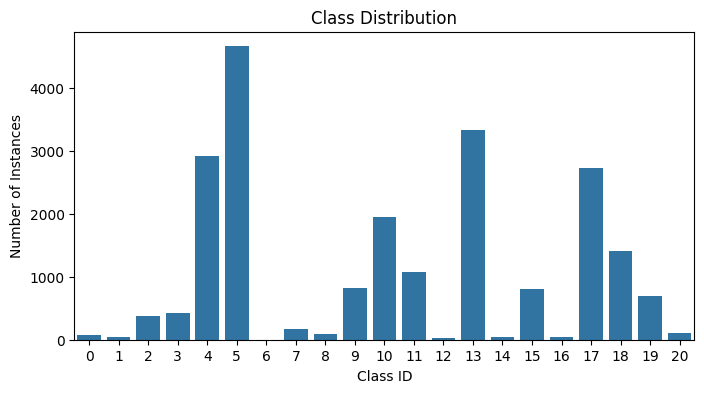

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x='Class ID', y='count', data=class_df)
plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Number of Instances')
plt.show()

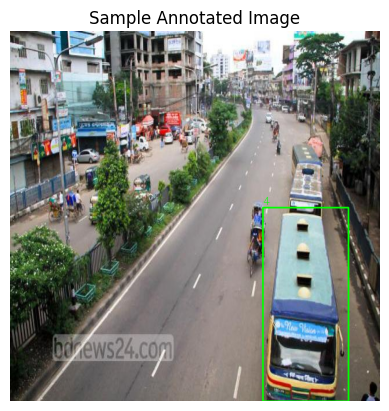

In [15]:
import cv2
import matplotlib.pyplot as plt

def draw_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            x1 = int((x - w / 2) * width)
            y1 = int((y - h / 2) * height)
            x2 = int((x + w / 2) * width)
            y2 = int((y + h / 2) * height)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, str(int(cls)), (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Sample Annotated Image")
    plt.show()

# Show one image
if image_files and label_files:
    draw_boxes(image_files[0], label_files[0])
else:
    print("No image or label files found.")


## 📦 2. Load the YOLOv5 Model

In [25]:
# Load a pretrained YOLOv5 model (you can also load your own trained model here)
model1 = YOLO('yolo11n.pt')  # Replace with your custom model path if needed


In [ ]:
results1 = model1.train(data="D:\Projects\TrafficDetection\Data\Data1\data.yaml", epochs=150, imgsz=640,project="D:\Projects\TrafficDetection\Models\model1")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\2389481522.py:1: SyntaxWarning: invalid escape sequence '\P'
  results1 = model1.train(data="D:\Projects\TrafficDetection\Data\Data1\data.yaml", epochs=150, imgsz=640,project="D:\Projects\TrafficDetection\Models\model1")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7664\2389481522.py:1: SyntaxWarning: invalid escape sequence '\P'
  results1 = model1.train(data="D:\Projects\TrafficDetection\Data\Data1\data.yaml", epochs=150, imgsz=640,project="D:\Projects\TrafficDetection\Models\model1")


New https://pypi.org/project/ultralytics/8.3.104 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.12.7 torch-2.6.0+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=D:\Projects\TrafficDetection\Data\Data1\data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=D:\Projects\TrafficDetection\Models\model1, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

train: Scanning D:\Projects\TrafficDetection\Data\Data1\train\labels... 2703 images, 0 backgrounds, 0 corrupt: 100%|███


train: New cache created: D:\Projects\TrafficDetection\Data\Data1\train\labels.cache


val: Scanning D:\Projects\TrafficDetection\Data\Data1\valid\labels... 300 images, 2 backgrounds, 0 corrupt: 100%|██████

val: New cache created: D:\Projects\TrafficDetection\Data\Data1\valid\labels.cache


Plotting labels to D:\Projects\TrafficDetection\Models\model1\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to D:\Projects\TrafficDetection\Models\model1\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150         0G      1.561      4.361      1.251        198        640:  45%|████▍     | 76/169 [10:52<12:10,  7

In [ ]:
# Load a pretrained YOLOv5 model (you can also load your own trained model here)
model2 = YOLO('yolo11n.pt')  # Replace with your custom model path if needed

In [ ]:
results2 = model2.train(data="D:\Projects\TrafficDetection\Data\Data2\data.yaml", epochs=150, imgsz=640,project="D:\Projects\TrafficDetection\Models\model2")

# Models evaluation

In [ ]:
display(Image('runs/val/exp/pr_curve.png'))
display(Image('runs/val/exp/confusion_matrix.png'))
display(Image('runs/val/exp/f1_curve.png'))

## 🎞️ 3. Load and Process Video

In [ ]:
# Define the path to your video file
video_path = 'traffic.mp4'  # Replace with your actual video path

# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Cannot open video file")

# Read the first frame for testing
ret, frame = cap.read()
if not ret:
    raise IOError("Cannot read from video")

# Convert frame from BGR to RGB for display
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.title("Sample Frame from Video")
plt.axis('off')
plt.show()


## 🧠 4. Run YOLOv5 Inference on Each Frame

In [ ]:
# Reopen the video to reset it
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO inference
    results = model(frame)

    # Render predictions on the frame
    annotated_frame = results[0].plot()

    # Display the result (press 'q' to quit)
    cv2.imshow('Traffic Detection', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## ✅ Conclusion

You now have a working traffic detection system using YOLOv11 You can enhance it by training your model on a custom dataset, optimizing for real-time performance, or deploying it on edge devices.